# Naive Bayes Classification

- Naive Bayes is a classification technique. 
- The foundation of naives bayes is the bayes theorem.
- It assumes the features used to make predictions are independent of each other( which is why it is called naive)
- Bayes Theorem states that 

$$
\begin{align*}
P(X|Y) = \frac{P(Y|X) \cdot P(X)}{P(Y)}
\end{align*}
$$

where,
$$
\begin{align*}
P(X|Y) & : \text{Posterior probability of class X given the observed feature Y} \\
P(Y|X) & : \text{Likelihood probability of feature Y given the class X} \\
 P(X)   & : \text{Prior Probability of class X} \\
 P(Y)   & : \text{Marginal Probability of class Y} \\
\end{align*}
$$


$$
P(X|Y) = \frac{P(X \cap Y)}{P(Y)}
$$

$$
P(Y|X) = \frac{P(Y \cap X)}{P(X)}
$$

Naive Bayes models are mainly divided into below 3:

- **Gaussian Naive Bayes:**
  -In Gaussian model, the features are assumed to be normally distributed.
- The values are assumed to be sampled from Gaussian distribution if the model takes continous values instead of discrete, 

- **Multinomial Naive Bayes:**
  - It is used when the data is multinomially distributed. Here the predictors take categorical values..

- **Binary Naive Bayes:**
  - It is mainly designed for binary feature data where features represnet either presence or absence. this model is famous for document classification.


## Dataset - ecoli.csv

- In our dataset 'ecoli.csv', we have choosen Guassian Naive Bayes model as our predictors X1,X2,X3,X4 are continous in nauture. Our independent variable is 'C' which is the class. We are predicting the class of ecoli bacteria based on the features(X1,X2,X3,X4). For applying Naive bayes model on the dataset following steps are done.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyp
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, average_precision_score

## Importing the dataset

In [2]:
data = pd.read_csv('ecoli.csv')  # to read dataset 'ecoli.csv'

In [3]:
# to select features and target variable from the dataset 

X = data.iloc[:, :-1] # Selecting all rows and all features(X1,X2,X3,X4,X5) column except the last column(C)
y = data.iloc[:, -1]  # Selecting all rows and last column (Class)

In [4]:
X

,X1,X2,X3,X4,X5
0,-0.007564,0.222171,0.158978,1.159728,0.267387
1,0.171858,-0.041690,0.250635,0.165851,0.461043
2,0.736046,0.343963,0.749114,0.561858,0.712554
3,0.000639,-0.175082,0.070584,0.317284,0.582597
4,0.571760,-0.244216,0.234515,0.902095,0.594026
...,...,...,...,...,...
124,0.648946,0.946382,0.893618,0.539939,0.532365
125,0.768015,0.955685,0.495043,0.100583,0.836665
126,0.649908,0.845137,0.406619,0.654427,1.003261
127,0.221111,0.787071,0.318218,0.867372,0.682562


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
124    1
125    1
126    1
127    1
128    1
Name: C, Length: 129, dtype: int64

## Splitting the data into Train set and Test set

In [6]:
# Importing train_test_split class from sklearn package

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)  

 Features(X) and Class(y) of data is divided into train 
 and test sets. 80% of data goes to training set and 20% into testing set.
 Random state is used to set the same sample seed

## Training Naives Bayes model on Train set

In [7]:

from sklearn.naive_bayes import GaussianNB   # using Gaussian Naive bayes classifier from scikit -learn library
classifier = GaussianNB()                    # creating gaussian naive bayes classifier
classifier.fit(Xtrain, ytrain)             # training the classifier on train data


GaussianNB()

In [8]:
# after training, predicting new data
ypred_naive = classifier.predict(Xtest)

## Performance of Naive Bayes Model

In [9]:
#Importing functions confusion_matrix,accuracy_score from Scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score

cf_mx_naive = confusion_matrix(ytest, ypred_naive)
print(cf_mx_naive)
accuracy_score(ytest, ypred_naive)

[[15  3]
 [ 3  5]]


0.7692307692307693

## Confusion Matrix
- It is a table used to evaluate classsification model's performance.
- It comprises of True Positives(TP), True Negatives(TN), False Positives(FP) and False Negatives(FN)

- **True Positives(TP):** Instance that are actually positive and predicted correctly as positive
- **False Positives(FP):** Instance that are actually Negative but predicted wrongly as positive
- **False Negatives(FN):** Instance that are actually positive but predicted wrongly as Negative
- **True Negatives(TN):** Instance that are actually negative and predicted correctly as negative


In [10]:
cf_mx_naive = confusion_matrix(ytest, ypred_naive)

print('Confusion_Matrix\n', cf_mx_naive)
print('True Positives(TP) = ', cf_mx_naive[0,0])
print('False Positives(FP) = ', cf_mx_naive[0,1])
print('False Negatives(FN) = ', cf_mx_naive[1,0])
print('True Negatives(TN) = ', cf_mx_naive[1,1])



Confusion_Matrix
 [[15  3]
 [ 3  5]]
True Positives(TP) =  15
False Positives(FP) =  3
False Negatives(FN) =  3
True Negatives(TN) =  5


<Axes: >

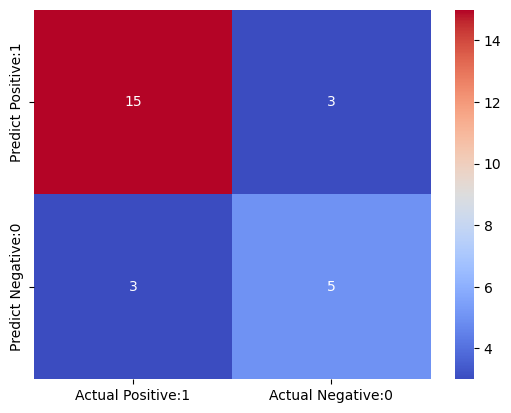

In [11]:
#  confusion matrix visualisation

cm_matrix = pd.DataFrame(data=cf_mx_naive, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')


## ROC Curve and AUC 

### ROC - Receiver Operating Characteristic**

- It graphically represents a classification model's performance 
- It plots true positive rate v/s false positive rate for several threshold values.
- Diagonal line represents a random classifier.
- Good Classifier's ROC curve will bend towards upper-left corner. It indicates higher true positive rates and lower false positive rates.

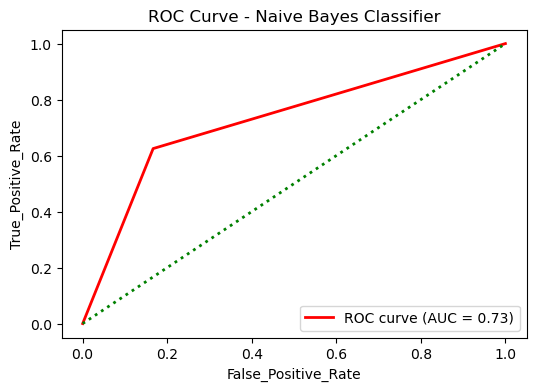

In [12]:
false_pos_nb,true_pos_nb,threshold = roc_curve(ytest, ypred_naive)
roc_auc_nb = auc(false_pos_nb, true_pos_nb)

# Plotting  ROC curve
pyp.figure(figsize=(6, 4))
pyp.plot(false_pos_nb, true_pos_nb, color='red',lw=2,label=f'ROC curve (AUC = {roc_auc_nb:.2f})')
pyp.plot([0, 1], [0, 1], color='green',lw=2,linestyle=':')
pyp.xlabel('False_Positive_Rate')
pyp.ylabel('True_Positive_Rate')
pyp.title('ROC Curve - Naive Bayes Classifier')
pyp.legend(loc="lower right")
pyp.show()

### AUC (Area under the Curve)

-  It represents the area under ROC curve.
-  AUC = 1; represents perfect classifier
-  AUC = 0.5 ; model is not effective in distinguishing classes
-  Ideally AUC closer to one indicates higher discriminating values.

# Cross Validation
- The main aim of cross validation is to divide the dataset into small portion and train the model on a portion of data and then evaluate it's performance. 
- This is repeated many times to provide a good assessment of how well the data predicts unseen data
- The most common method used is k-fold cross validation, in which  data is equally divided into k sized folds.
- The model is then trained k times, with each time using each folds using exactly once.

In [13]:
from sklearn.model_selection import cross_val_score
cv_scores_naive = cross_val_score(classifier, Xtrain, ytrain, cv=5)  # Adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_naive)

Cross-Validation Scores: [0.66666667 0.76190476 0.71428571 0.75       0.8       ]


In [14]:
average_cv_score_naive = cv_scores_naive.mean()
print("Average Cross-Validation Score:", average_cv_score_naive)

Average Cross-Validation Score: 0.7385714285714287


## Classification Metrices

In [15]:
 # using classification_report function from Scikit-learn 

print(classification_report(ytest, ypred_naive))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.62      0.62      0.62         8

    accuracy                           0.77        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.77      0.77      0.77        26



### Classification Accuracy
- It is the ratio of total number of correct prediction( TP + TN) to the total number of prediction made (TP+TN+FP+FN), expressed as percentage.
- Higher accuracy represents higher performance

In [16]:
True_pos = cf_mx_naive[0,0]
True_neg = cf_mx_naive[1,1]
False_pos = cf_mx_naive[0,1]
False_neg = cf_mx_naive[1,0]

In [17]:
classification_accuracy_naive = (True_pos + True_neg)*100  / float(True_pos + True_neg + False_pos + False_neg)

print('Classification accuracy : {0:0.2f} %'.format(classification_accuracy_naive))

Classification accuracy : 76.92 %


### Classification Error
- It is complementary to Classification Accuracy.
- It is the ratio of incorrectly predicted instances to the total number of prediction expressed as percentage

In [18]:
classification_error_naive = (False_pos + False_neg)*100 / float(True_pos + True_neg + False_pos + False_neg)

print('Classification error : {0:0.2f} %'.format(classification_error_naive))

Classification error : 23.08 %


### Precision
- It is the ratio of true positive prediction to the total number of positive prediction(TP+FP)
- It shows out of the total positive prediction made by the model, how many are really positive.
- Higher precision shows that the model is accuracy predicting actual positive values minimising false negatives

In [19]:
precision_naive = True_pos / float(True_pos + False_pos)

print('Precision : {0:0.2f}'.format(precision_naive))


Precision : 0.83


### Recall
- Also known as sensitivity or true positive rate
- It is the ratio of True positive to the sum of True positive and False Negative.
- It is the appropriate metric to choose when minimum false negatives is required
- Higher value indicates the model is good in predicting positive values

In [20]:
recall_naive = True_pos / float(True_pos + False_neg)

print('Recall or Sensitivity : {0:0.2f}'.format(recall_naive))

Recall or Sensitivity : 0.83


### Specificity
- The ability of model to predict negative cases correctly. 
- It is calculated as the ratio of True Negative to the sum of Total Negative and False positives.
- Higher value indicates the model is good in avoiding false positive prediction.

In [21]:
specificity_naive = True_neg / (True_neg + False_pos)

print('Specificity : {0:0.2f}'.format(specificity_naive))

Specificity : 0.62


### f1- score
- It combine both recall and precision to create a balanced measure for calssification prediction.
- It is the harmonic mean of precision and recall.
- Higher value of f1- score indicates good performance.


In [22]:
f1_score_naive = 2* precision_naive * recall_naive / (precision_naive + recall_naive)

print('f1_score : {0:0.2f}'.format(f1_score_naive))

f1_score : 0.83



# Logistic Regression 

- It is mainly used when the target variable is categorical in nature.
- This means that it can have only two possible outcome. 0 or 1, True or False, Yes or No.
- Logistic Regression outputs probabilities ranging between 0 and 1.
- Logistic Regression uses sigmoid function to convert any values of features between -infinity to +infinity to a discrete value that logistic regression wants.
- Decisoion boundary is the thresold that seperates classes.


The sigmoid function s(x) is defined as

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
e = Euler's number

If we have a data point and we have decide whether its 0 or 1, we use threshold value. Threshold value decides the probability of 0 and 1. If the datapoint is above the threshold value, its have the probability of 1 and if its below threshold value it have probablity of 0. 

Logistic Regression equation is derived from the equation of a straight line which is 

$$
\begin{align*}
Y &= C + \beta_1X + \beta_2X_2 + \ldots + \beta_nX_n \qquad\qquad\qquad\qquad\qquad\text{Range is from  -(infinity) to (infinity)}\\
Y &= C + \beta_1X + \beta_2X_2 + \ldots + \beta_nX_n \qquad\qquad\qquad\qquad\qquad\text{In Logistic equation Y can be only from 0 to 1}\\
\end{align*}
$$

        Now to get Y in range of 0 and infinity lets transform Y
$$
\begin{align*}
\frac{Y}{1-Y}\qquad Y &= 0,\qquad then\qquad0\\
 Y &= 1,\qquad then \qquad infinity\\
\end{align*}
$$
    to get Y in range of - infinity and infinity lets transform Y
$$
\begin{align*}
log\frac{Y}{1-Y}
\end{align*}
$$  


 Y is defined as 

$$
Y = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}
$$

- e = Euler's number
- Y is the predicted output
- X is the input value
- β0 is the Constant coefficient
- β1 is the coefficient of Independent variable x

In [23]:
 # importing LogisticRegression from scikit- learn
Log_classifier = LogisticRegression(random_state = 0)
Log_classifier.fit(Xtrain, ytrain)

LogisticRegression(random_state=0)

In [24]:
# after training, predicting new data
ypred_lg =Log_classifier.predict(Xtest)

## Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf_mx_lg = confusion_matrix(ytest, ypred_lg)
print(cf_mx_lg)
accuracy_score(ytest, ypred_lg)

[[14  4]
 [ 3  5]]


0.7307692307692307

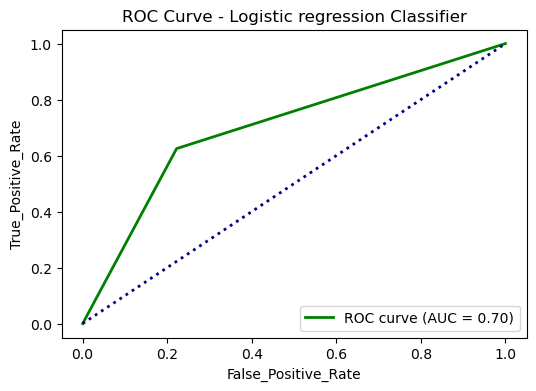

In [26]:
# Plot ROC curve
false_pos_lg, true_pos_lg, threshold = roc_curve(ytest, ypred_lg)
roc_auc_lg = auc(false_pos_lg, true_pos_lg)

pyp.figure(figsize=(6, 4))
pyp.plot(false_pos_lg, true_pos_lg, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_lg:.2f})')
pyp.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
pyp.xlabel('False_Positive_Rate')
pyp.ylabel('True_Positive_Rate')
pyp.title('ROC Curve - Logistic regression Classifier')
pyp.legend(loc="lower right")
pyp.show()

<Axes: >

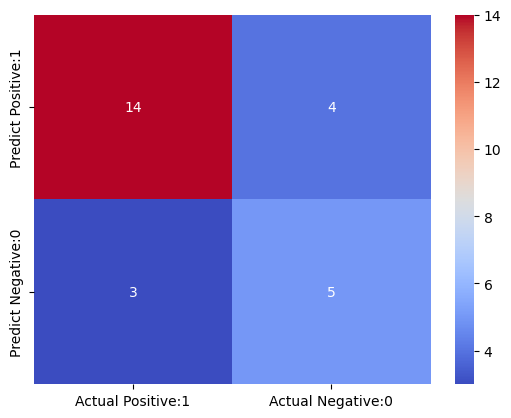

In [27]:
# confusion matrix visualisation

cf_matrix = pd.DataFrame(data=cf_mx_lg, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='coolwarm')

In [28]:
cv_scores_lg = cross_val_score(Log_classifier, Xtrain, ytrain, cv=5)  # Adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_lg)

Cross-Validation Scores: [0.76190476 0.76190476 0.76190476 0.8        0.8       ]


In [29]:
average_cv_score_lg = cv_scores_lg.mean()
print("Average Cross-Validation Score:", average_cv_score_lg)

Average Cross-Validation Score: 0.777142857142857


# Classification metrices

In [30]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_lg))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.56      0.62      0.59         8

    accuracy                           0.73        26
   macro avg       0.69      0.70      0.69        26
weighted avg       0.74      0.73      0.73        26



In [31]:
True_pos = cf_mx_lg[0,0]
True_neg = cf_mx_lg[1,1]
False_pos = cf_mx_lg[0,1]
False_neg = cf_mx_lg[1,0]

In [32]:
# classification accuracy

classification_accuracy_lg = (True_pos + True_neg)*100  / float(True_pos + True_neg + False_pos + False_neg)


print('Classification accuracy : {0:0.2f} %'.format(classification_accuracy_lg))

Classification accuracy : 73.08 %


In [33]:
# classification error

classification_error_lg = (False_pos + False_neg)*100 / float(True_pos + True_neg + False_pos + False_neg)

print('Classification error : {0:0.2f}'.format(classification_error_lg))

Classification error : 26.92


In [34]:
#precision score

precision_lg = True_pos / float(True_pos + False_pos)
precision_lg_scalar = precision_lg.item()

print('Precision : {0:0.4f}'.format(precision_lg_scalar))


Precision : 0.7778


In [35]:
#recall

recall_lg = True_pos / float(True_pos + False_neg)
recall_lg_scalar = recall_lg.item()

print('Recall or Sensitivity : {0:0.4f}'.format(recall_lg_scalar))

Recall or Sensitivity : 0.8235


In [36]:
#specificity

specificity_lg = True_neg / (True_neg + False_pos)

print('Specificity : {0:0.4f}'.format(specificity_lg))

Specificity : 0.5556


In [37]:
#f1-score

f1_score_lg = 2* precision_lg * recall_lg / (precision_lg + recall_lg)

print('f1_score : {0:0.4f}'.format(f1_score_lg))

f1_score : 0.8000


# Use of visualisation in validating the methods and comparing their performance 

In [38]:
y_probs_nb = classifier.predict_proba(Xtest)[:, 1]
y_probs_lr = Log_classifier.predict_proba(Xtest)[:, 1]

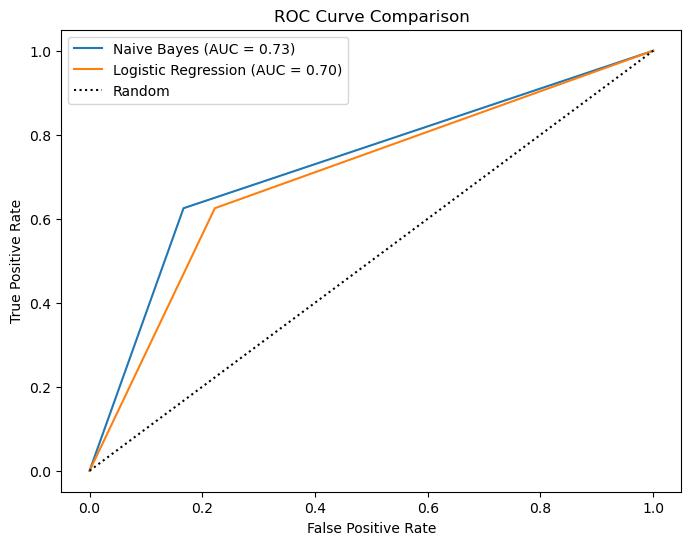

In [39]:
roc_auc_nb = auc(false_pos_nb, true_pos_nb)
roc_auc_lg = auc(false_pos_lg, true_pos_lg)

pyp.figure(figsize=(8, 6))
pyp.plot(false_pos_nb, true_pos_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
pyp.plot(false_pos_lg, true_pos_lg, label=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')
pyp.plot([0, 1], [0, 1], 'k:', label='Random')
pyp.xlabel('False Positive Rate')
pyp.ylabel('True Positive Rate')
pyp.title('ROC Curve Comparison')
pyp.legend()
pyp.show()

AUC of Naive bayes is higher than Logistic Regression. Higher AUC suggests that the model has better ability to distinguish true and false classes

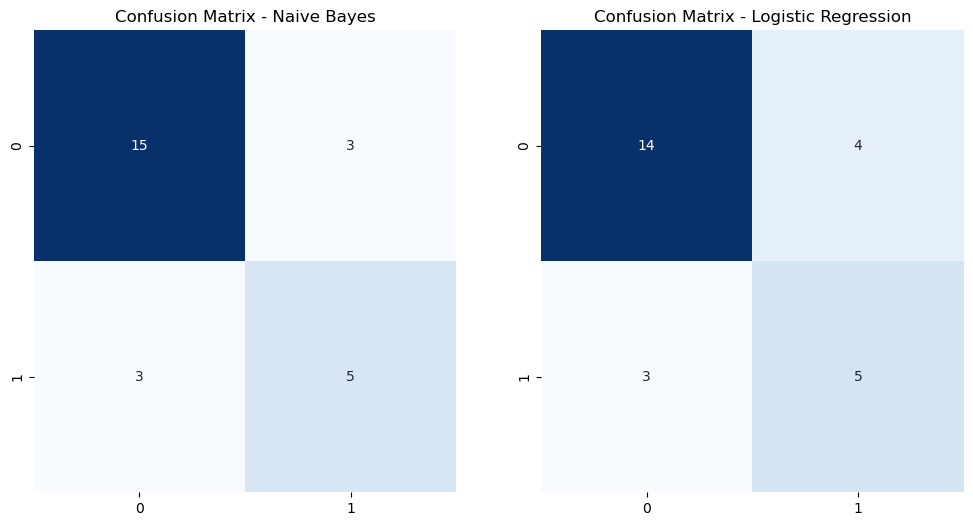

In [40]:
cf_mx_naive = confusion_matrix(ytest, ypred_naive)
cf_mx_lg = confusion_matrix(ytest, ypred_lg)

pyp.figure(figsize=(12, 6))
pyp.subplot(1, 2, 1)
sns.heatmap(cf_mx_naive, annot=True, fmt='d', cmap='Blues', cbar=False)
pyp.title('Confusion Matrix - Naive Bayes')

pyp.subplot(1, 2, 2)
sns.heatmap(cf_mx_lg, annot=True, fmt='d', cmap='Blues', cbar=False)
pyp.title('Confusion Matrix - Logistic Regression')

pyp.show()


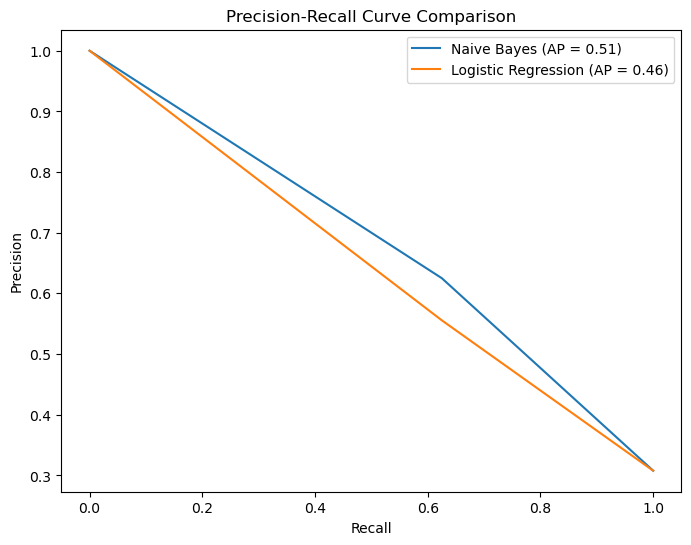

In [41]:
#using precision_recall_curve, average_precision_score from scikit -learn
precision_nb, recall_nb, _ = precision_recall_curve(ytest, ypred_naive)
precision_lg, recall_lg, _ = precision_recall_curve(ytest, ypred_lg)

avg_precision_nb = average_precision_score(ytest, ypred_naive)
avg_precision_lg = average_precision_score(ytest, ypred_lg)

pyp.figure(figsize=(8, 6))
pyp.plot(recall_nb, precision_nb, label=f'Naive Bayes (AP = {avg_precision_nb:.2f})')
pyp.plot(recall_lg, precision_lg, label=f'Logistic Regression (AP = {avg_precision_lg:.2f})')
pyp.xlabel('Recall')
pyp.ylabel('Precision')
pyp.title('Precision-Recall Curve Comparison')
pyp.legend()
pyp.show()

Average precision score ranges from 0 to 1 and is used to evaluate precision- recall trade off. Higher value indicates better performance. Since Naive bayes has average precision score higher compared to Logistic regression it is more performing.

In [42]:
print(f"Classification Accuracy of Naive Bayes model : {classification_accuracy_naive:.2f} %")

print(f"Classification Error of Naive Bayes model : {classification_error_naive:.2f} %")

print(f"Precision Naive of Naive Bayes model: {precision_naive:.2f}")

print(f"Recall of Naive Bayes model: {recall_naive:.2f}")

print(f"Specificity of Naive Bayes model : {specificity_naive:.2f}")

print(f"F1-score of Naive Bayes model: {f1_score_naive:.2f}")

print(f"Specificity of Naive Bayes model : {specificity_naive:.2f}")

print("Average Cross-Validation Score of Naive Bayes model:", average_cv_score_naive)

Classification Accuracy of Naive Bayes model : 76.92 %
Classification Error of Naive Bayes model : 23.08 %
Precision Naive of Naive Bayes model: 0.83
Recall of Naive Bayes model: 0.83
Specificity of Naive Bayes model : 0.62
F1-score of Naive Bayes model: 0.83
Specificity of Naive Bayes model : 0.62
Average Cross-Validation Score of Naive Bayes model: 0.7385714285714287


In [43]:
print(f"Classification Accuracy of Logistic Regression model : {classification_accuracy_lg:.2f} %")

print(f"Classification Error ofLogistic Regression model : {classification_error_lg:.2f} %")

print(f"Precision of Logistic Regression model: {precision_lg_scalar:.2f}")

print(f"Recall of Logistic Regression modell: {recall_lg_scalar:.2f}")

print(f"Specificity of Logistic Regression model : {specificity_lg:.2f}")

print(f"F1-score of Logistic Regression model: {f1_score_lg:.2f}")

print(f"Specificity of Logistic Regression model : {specificity_lg:.2f}")

print("Average Cross-Validation Score of Logistic Regression model:", average_cv_score_lg)

Classification Accuracy of Logistic Regression model : 73.08 %
Classification Error ofLogistic Regression model : 26.92 %
Precision of Logistic Regression model: 0.78
Recall of Logistic Regression modell: 0.82
Specificity of Logistic Regression model : 0.56
F1-score of Logistic Regression model: 0.80
Specificity of Logistic Regression model : 0.56
Average Cross-Validation Score of Logistic Regression model: 0.777142857142857


## CONCLUSION

### Classification Accuracy:
- Naive Bayes: 76.92%
- Logistic Regression: 73.08%
- The Naive Bayes model has a slightly higher classification accuracy.

### Precision:
- Naive Bayes: 0.83
- Logistic Regression: 0.78
- As Naive Bayes is having higher precision,it has good  ability to classify positive instances.

### Recall:

- Naive Bayes: 0.83
- Logistic Regression: 0.82
- Both models have similar recall values

### Specificity:

- Naive Bayes: 0.62
- Logistic Regression: 0.56
- Naive Bayes has a higher specificity, suggesting better performance in correctly identifying negative instances.

### F1-score:

- Naive Bayes: 0.83
- Logistic Regression: 0.80
- Naive Bayes has a higher F1-score, indicating a better balance between precision and recall.

### Average Cross-Validation Score:

- Naive Bayes: 0.7386
- Logistic Regression: 0.7771
- Logistic Regression has a slightly higher average cross-validation score.

#### In summary, while both models have their strengths, Naive Bayes seems to perform slightly better in terms of classification accuracy, precision, specificity, and F1-score. However, the choice between the models may also depend on other considerations, such as interpretability, computational efficiency, and the specific goals of our application.